# Simple example of calculating matrix elements

In [1]:
import logging

import matplotlib.pyplot as plt
import numpy as np

from numerov.matrix_elements import radial_matrix_element
from numerov.rydberg import RydbergState

logging.basicConfig(level=logging.INFO, format="%(levelname)s %(filename)s: %(message)s")
# logging.getLogger("numerov").setLevel(logging.DEBUG)

In [2]:
n_list = list(range(30, 120))
matrixelements = []
for n in n_list:
    print(f"{n} / {n_list[-1]}", end="\r")
    l = n - 1
    j = n - 0.5
    m = j
    state_i = RydbergState("Rb", n, l, j, dz=0.001)
    state_f = RydbergState("Rb", n + 3, l + 1, j, dz=0.001)
    state_i.integrate()
    state_f.integrate()
    m = radial_matrix_element(state_i, state_f, 1)
    matrixelements.append(np.abs(m))

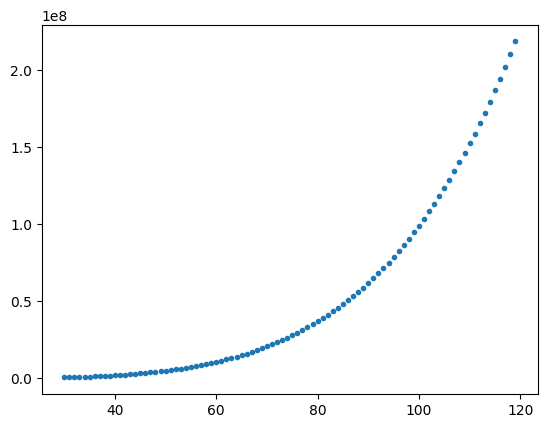

In [3]:
plt.plot(n_list, matrixelements, "C0.")
plt.show()